In [1]:
import pandas as pd
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import seaborn as sns
from mistune.helpers import parse_link_label
from sympy.printing.pretty.pretty_symbology import line_width
from torch.utils.bundled_inputs import bundle_randn

%matplotlib inline

In [18]:
df = pd.read_csv('data/car_price_dataset.csv')

In [19]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [21]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [128]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


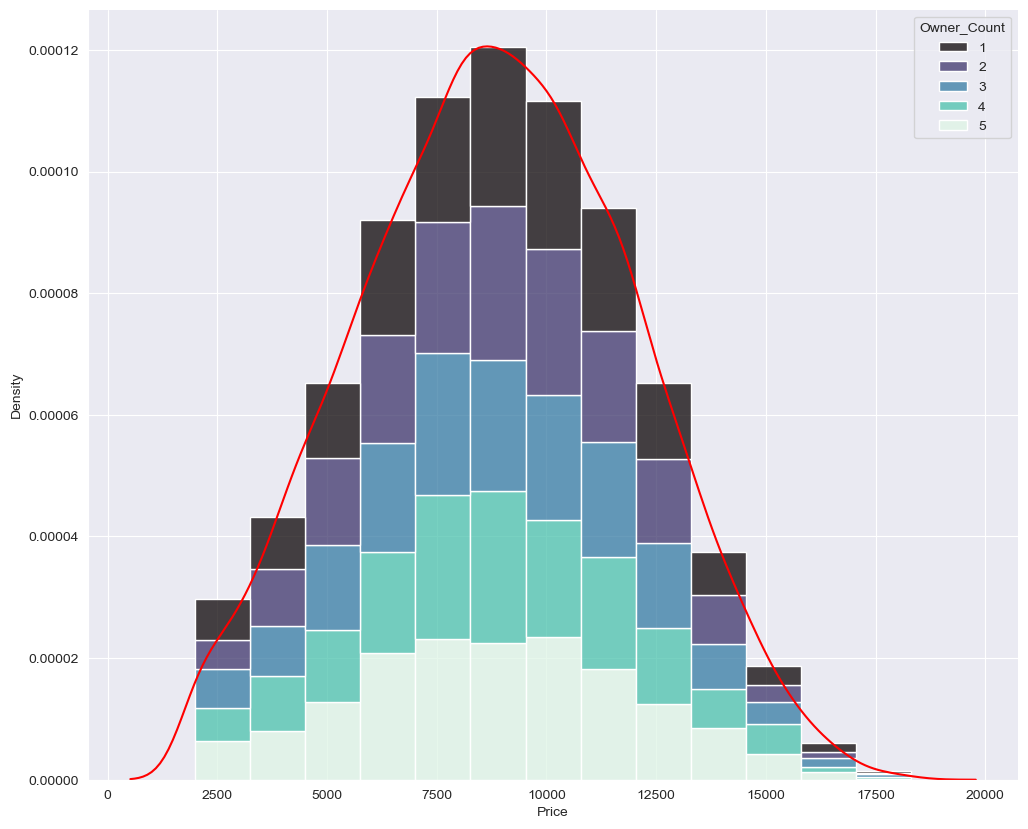

In [135]:
plt.close()
fig, ax = plt.subplots(figsize=(12,10))
sns.despine()

sns.histplot(
    x=df['Price'],
    hue=df['Owner_Count'],
    binwidth=df['Price'].max()/15,
    palette='mako',
    multiple='stack',
    stat='density'
)

sns.kdeplot(
    data = df,
    x='Price',
    color='red'
)

plt.show()

In [23]:
labels = df['Brand'].unique()

In [27]:
labels

array(['Kia', 'Chevrolet', 'Mercedes', 'Audi', 'Volkswagen', 'Toyota',
       'Honda', 'BMW', 'Hyundai', 'Ford'], dtype=object)

In [62]:
BrandDivided = {c : df[df['Brand']==c] for c in df['Brand'].unique()}
nBrandDivided = []
for k, i in BrandDivided.items():
    nBrandDivided.append(i['Price'])

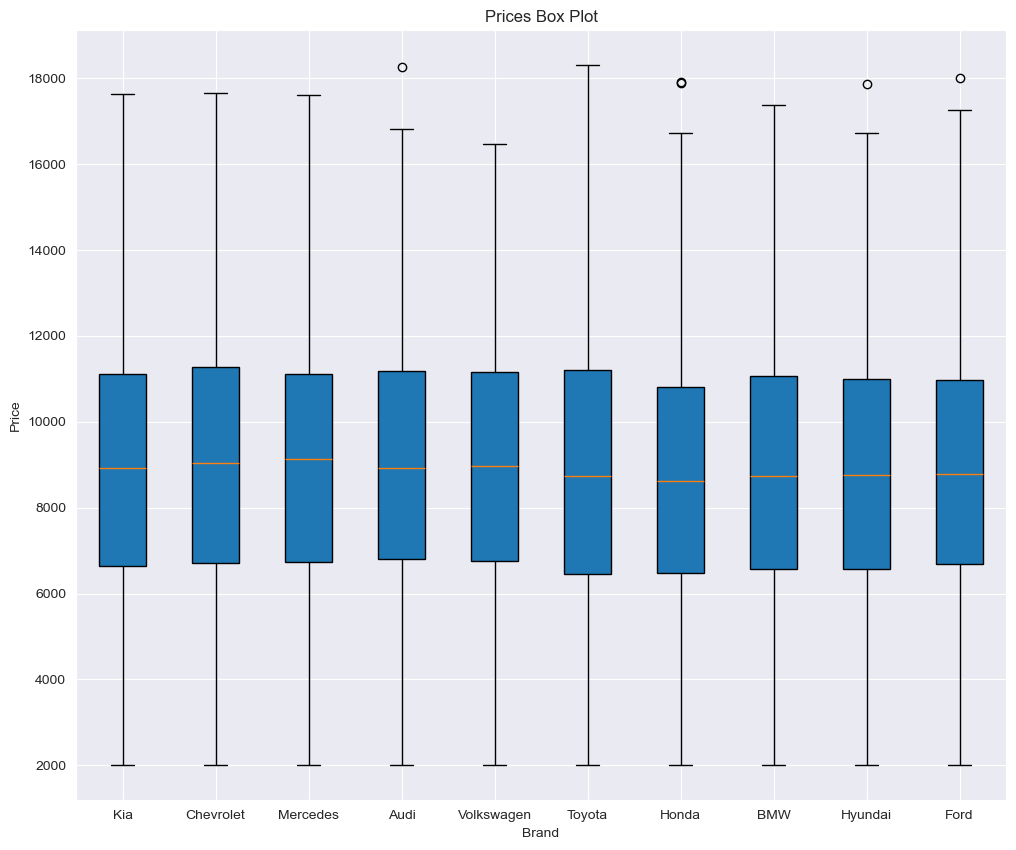

In [111]:
plt.close()
fig, ax = plt.subplots(figsize=(12,10))
ax.set_xlabel('Brand')
ax.set_ylabel('Price')
ax.set_title('Prices Box Plot')
ax.boxplot(nBrandDivided,
           patch_artist=True,
           tick_labels=labels
           )
plt.show()

In [92]:
dfNormMile = (df['Mileage'] - df['Mileage'].min()) / (df['Mileage'].max() - df['Mileage'].min())

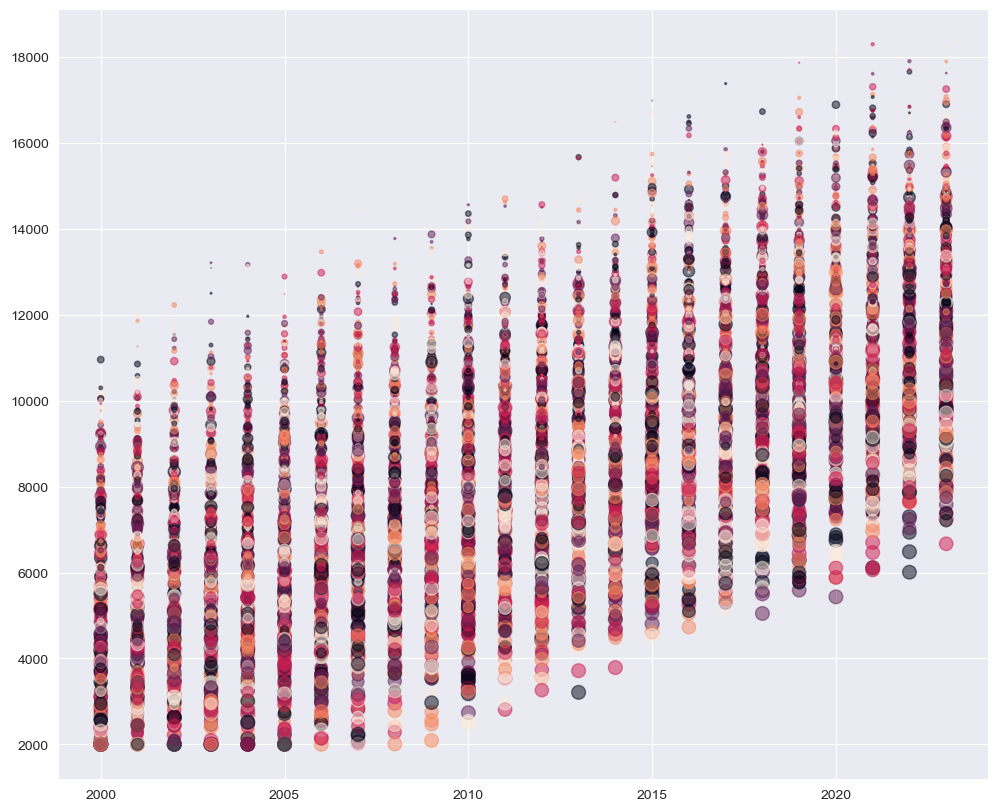

In [101]:
plt.close()
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(x=df['Year'], y=df['Price'], s=dfNormMile*100, c=df['Owner_Count'], alpha=0.5)
plt.show()

In [74]:
dfNormMile

0       0.966648
1       0.017775
2       0.771584
3       0.536626
4       0.955558
          ...   
9995    0.019235
9996    0.560062
9997    0.288872
9998    0.752686
9999    0.526327
Name: Mileage, Length: 10000, dtype: float64